In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [516]:
input ='/kaggle/input/red-wine/winequality-red.csv'
data = pd.read_csv(input, sep =';')

In [517]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [518]:
data.shape

(1599, 12)

In [519]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [520]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [521]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [522]:
n_wines = data.shape[0]
# wines rating >= 7 => consider to be very good quality
# wines 5 >= rating >= 6  => consider to be average quality
#  wines rating < 5 => bad quality

# no of wines with very good quality
qual_above_6 = data.loc[(data['quality']) >6]
n_above_6 = qual_above_6.shape[0]

# no of wines with rating below 5
qual_below_5 = data.loc[(data['quality']) <5]
n_below_5 = qual_below_5.shape[0]

#no of wines with quality between 5 to 6
qual_btw_5_6 = data.loc[ (data['quality'] <=6) & (data['quality'] >=5) ]
n_btw_5_6 = qual_btw_5_6.shape[0]

#percentage of wimes with rating abv 6
vgood_percentage = n_above_6*100/n_wines

print(f"Total no of wine data: {n_wines}")
print(f"Wine with ratings 7 n abv: {n_above_6}")
print(f"Wine with ratings less than 5: {n_below_5}")
print(f"Wine with ratings between 5 & 6: {n_btw_5_6}")

print(f"percentage of wines that are of very good quality:{vgood_percentage:.2f}%")

Total no of wine data: 1599
Wine with ratings 7 n abv: 217
Wine with ratings less than 5: 63
Wine with ratings between 5 & 6: 1319
percentage of wines that are of very good quality:13.57%


In [523]:
quality = data[['quality']]
print(f"mean is { quality.mean()}")

mean is quality    5.636023
dtype: float64


implies most wines fall under average quality category whereas very few arent that tasty(low rating)

In [524]:
quality.head(2)

,quality
0,5
1,5


In [525]:
quality.value_counts().sort_index(ascending=False)

quality
8           18
7          199
6          638
5          681
4           53
3           10
Name: count, dtype: int64

Text(0, 0.5, 'No of wines')

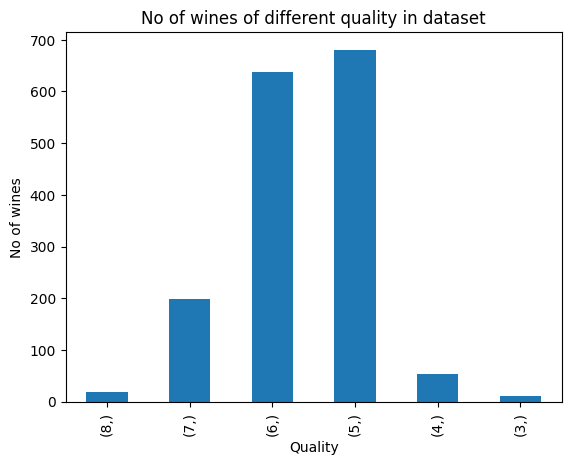

In [553]:
quality = pd.DataFrame(quality)
ax = quality.value_counts().sort_index(ascending=False).plot(kind='bar', title="No of wines of different quality in dataset")
ax.set_xlabel('Quality')
ax.set_ylabel('No of wines')

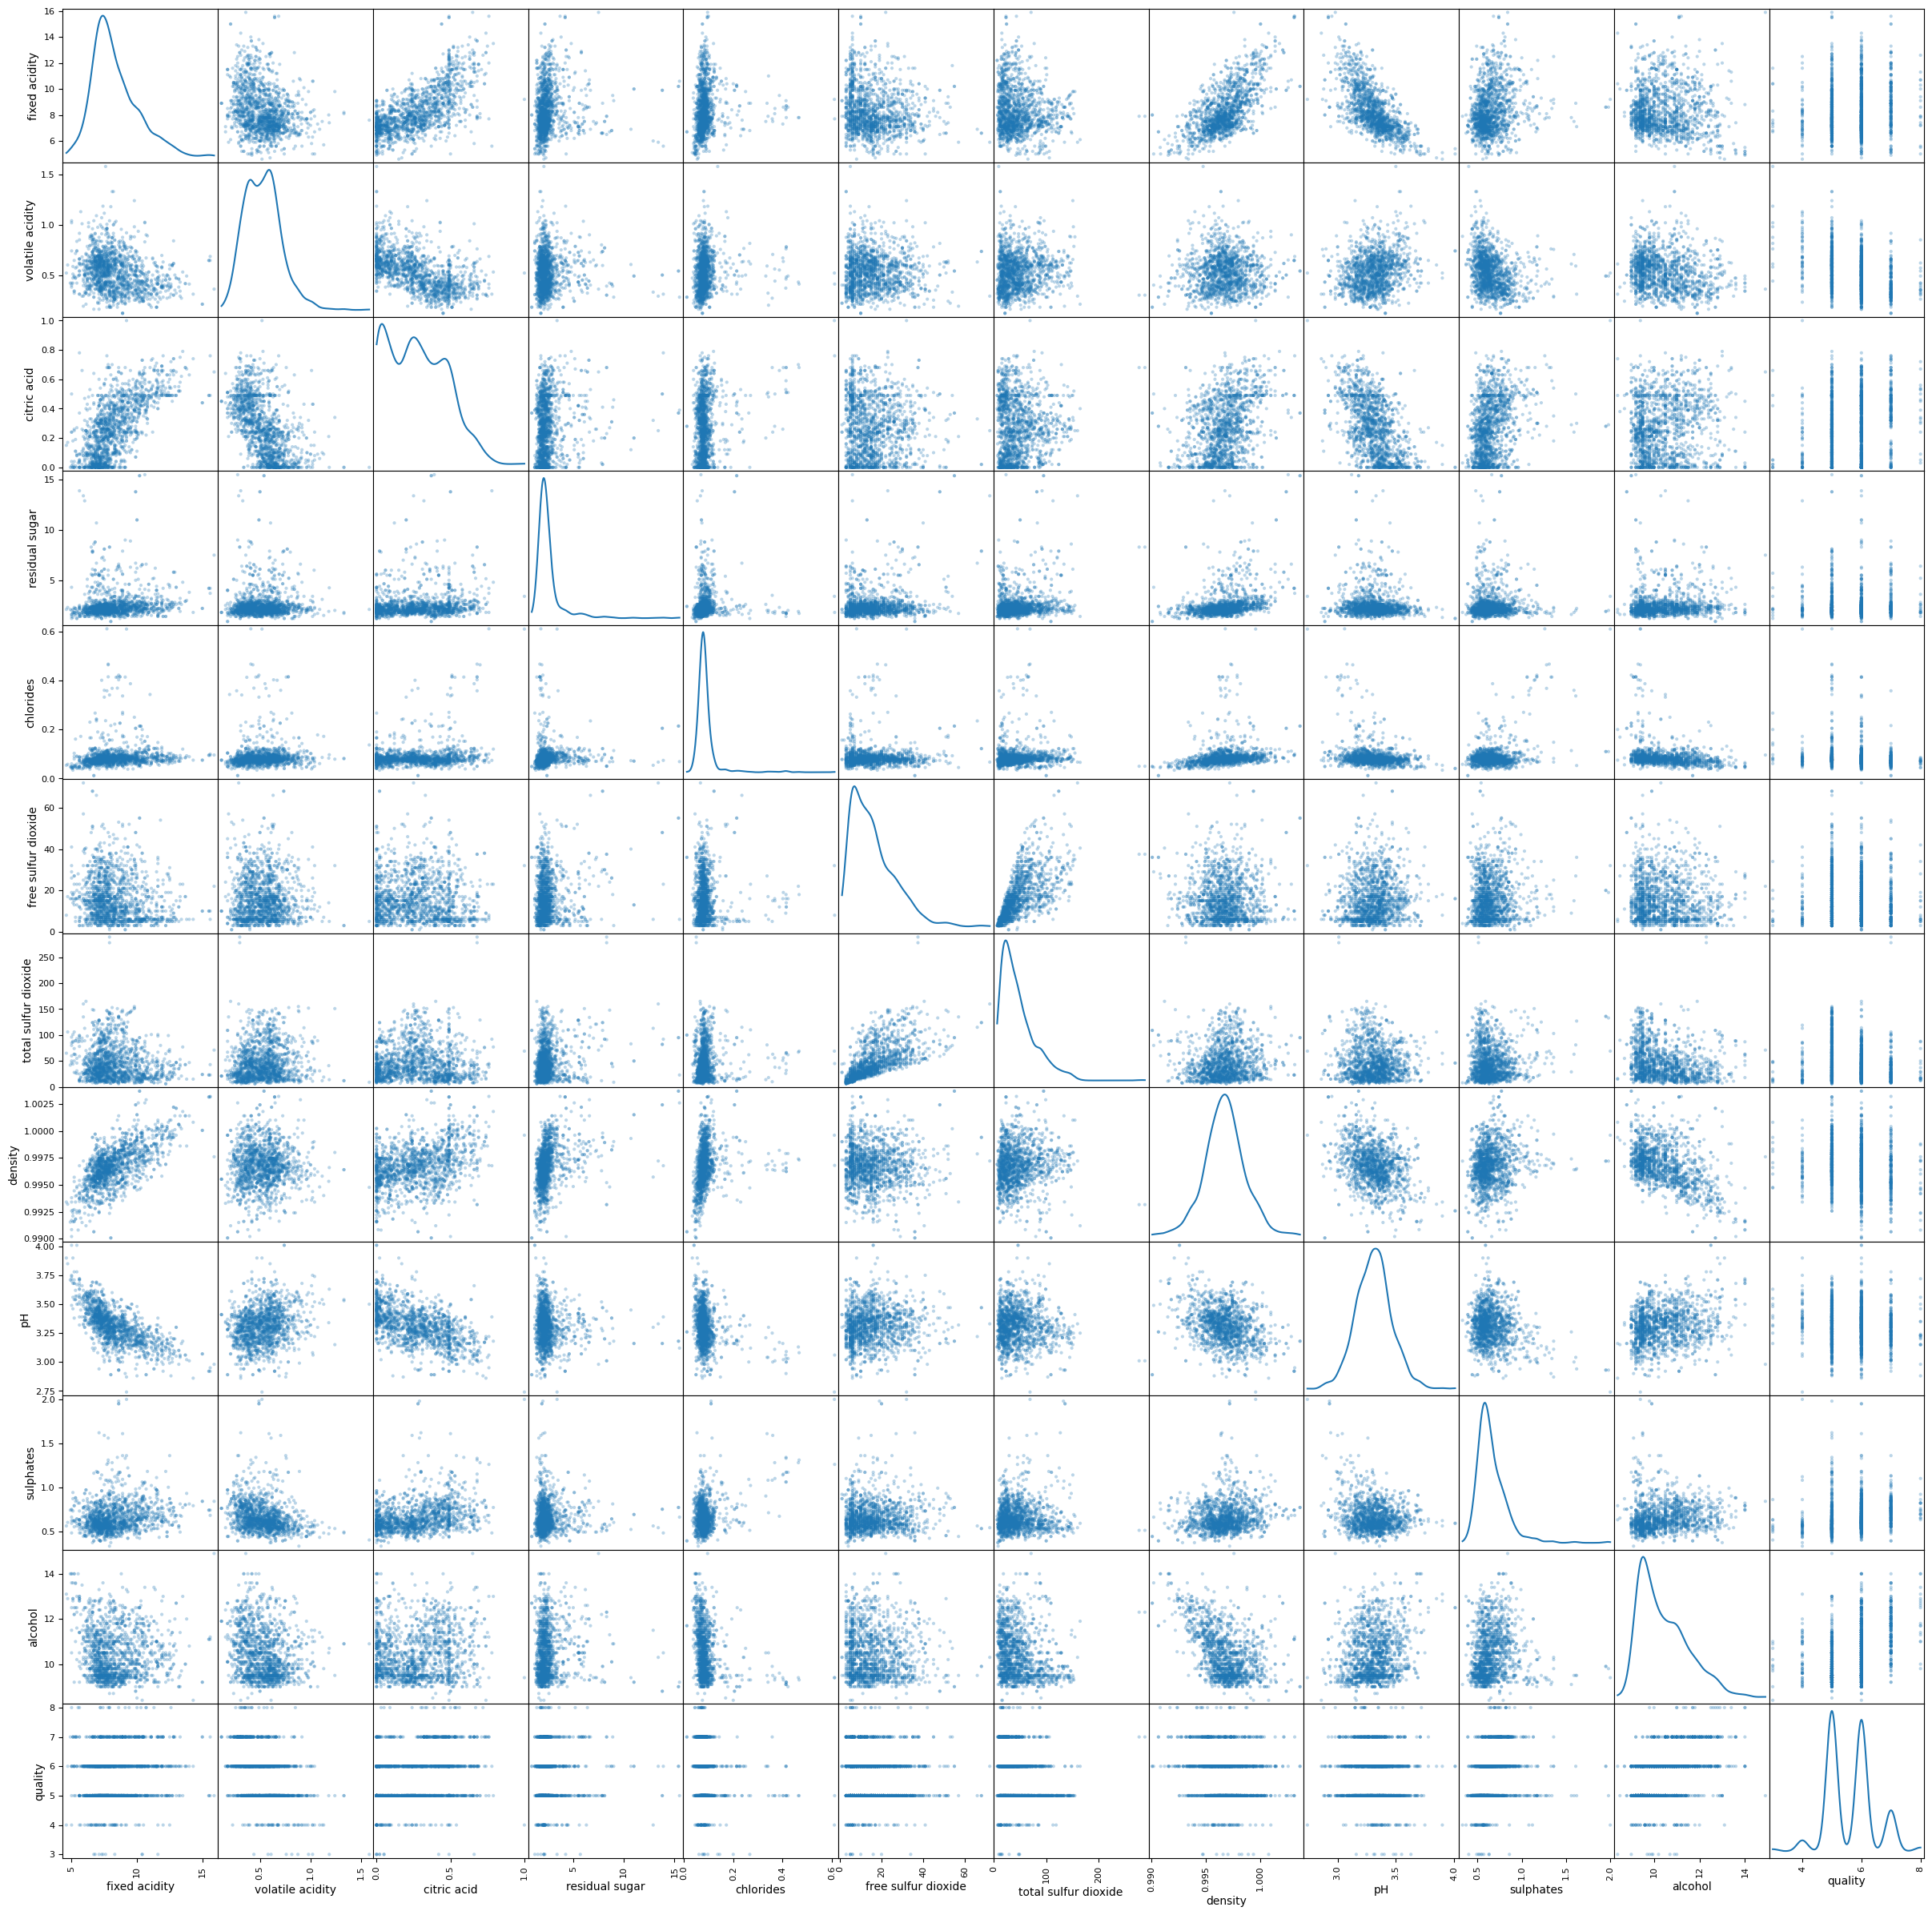

In [527]:
pd.plotting.scatter_matrix(data, alpha= 0.3, figsize =(30,30),diagonal ='kde');

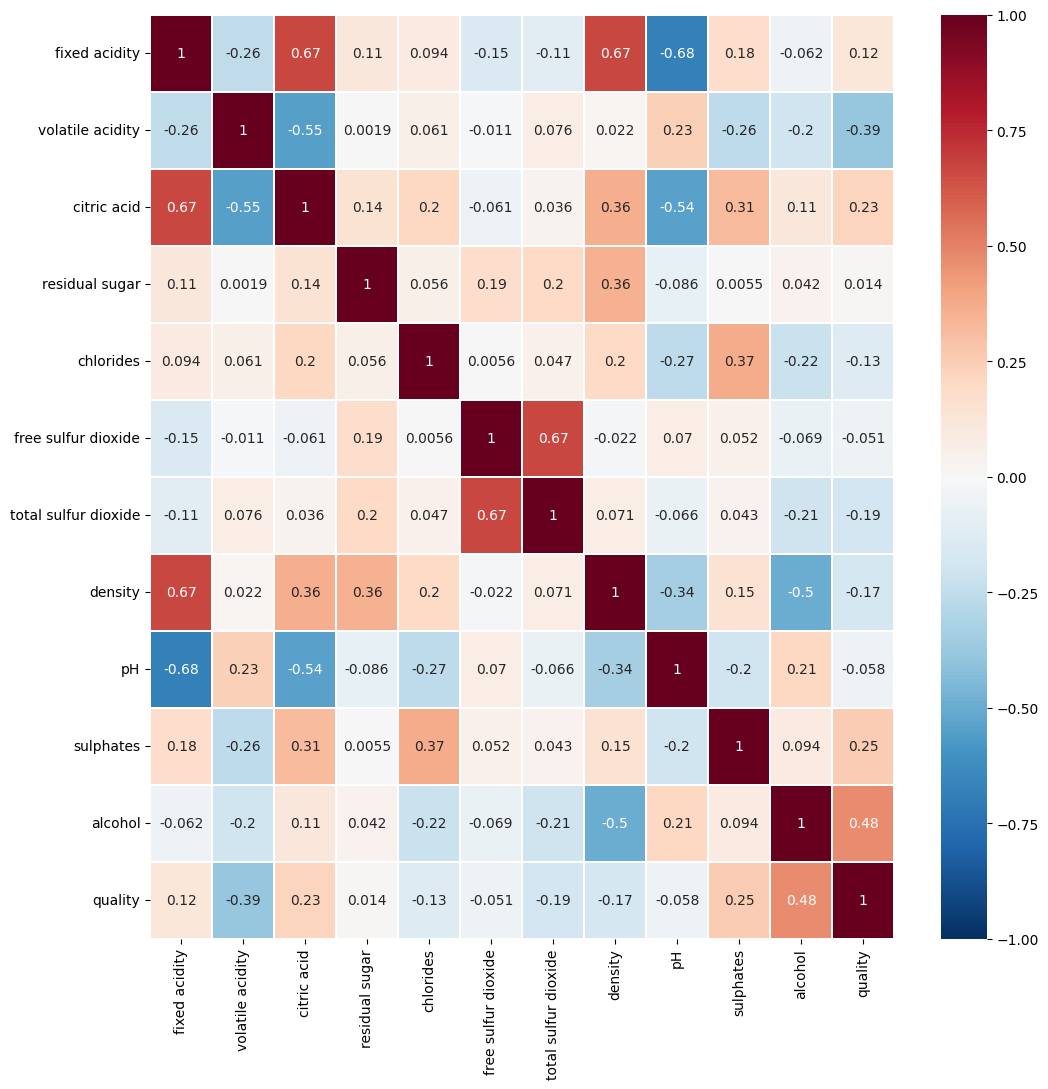

In [528]:
correlation = data.corr()
plt.figure(figsize = (12,12))
heatmap = sns.heatmap(correlation, annot=True, vmin = -1, vmax =1 , linewidths =0.2, cmap='RdBu_r' )

#### pH vs fixed acidity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


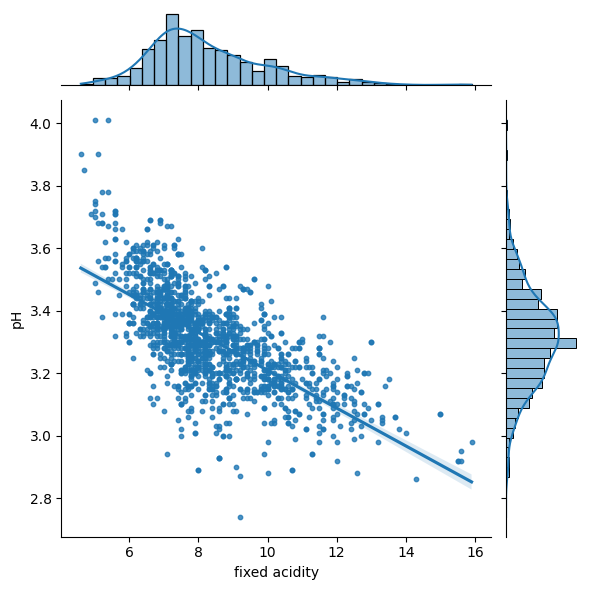

In [529]:
# pH vs fixed acidity => -0.68

#new df for ph n fixed acidity
df_ph_acidity = data[['pH','fixed acidity']]
a = sns.JointGrid(x ='fixed acidity', y ='pH', data=df_ph_acidity)
# draw regression plot in grid
a = a.plot_joint(sns.regplot, scatter_kws = {'s':10} )
#draw distribution plot in same grid
a = a.plot_marginals(sns.histplot, kde=True)
plt.show()

##### as fixed acidity level increases the pH value drops

#### citric acid vs fixed acidity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


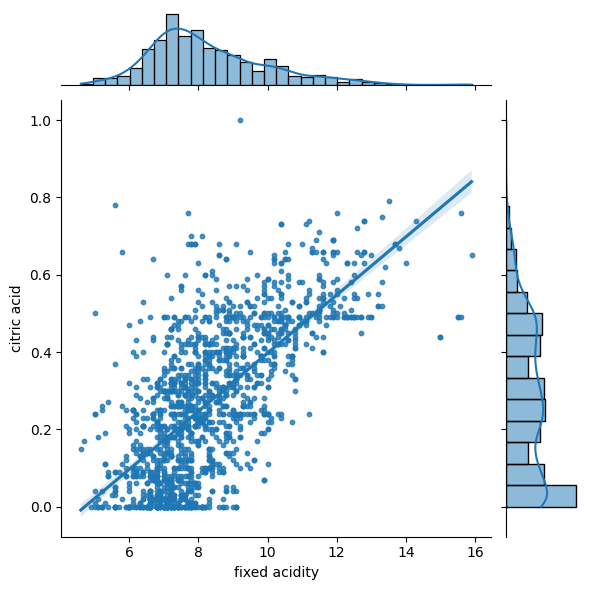

In [530]:
# fixed acidity vs citric acid
df_citricacid_acidity = data[['citric acid','fixed acidity']]
b = sns.JointGrid(x ='fixed acidity', y ='citric acid', data=df_citricacid_acidity)
b = b.plot_joint(sns.regplot, scatter_kws = {'s':10} )
b = b.plot_marginals(sns.histplot, kde=True)
plt.show()

##### as amount of citric acid increases the fixed acidity levels increase

#### Volatile Acidity vs Quality

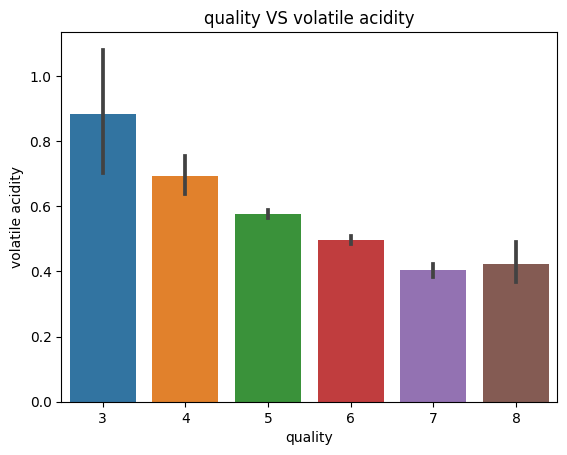

In [531]:
df_volatileacidity_quality = data[['quality','volatile acidity']]
sns.barplot(x='quality', y='volatile acidity', data=df_volatileacidity_quality)
plt.title('quality VS volatile acidity')
plt.show()

#### Quality vs Alcohol

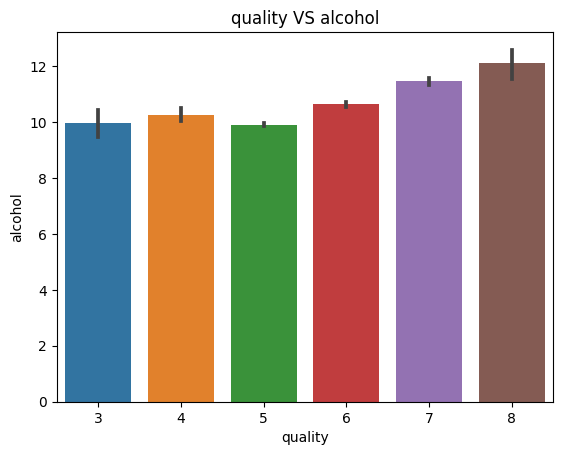

In [532]:
df_alcohol_quality = data[['quality','alcohol']]
sns.barplot(x='quality', y='alcohol', data=df_alcohol_quality)
plt.title('quality VS alcohol')
plt.show()

# ML to predict quality of wines

#### TODO: Convert the regression problem into a classification problem
--------------
For our purposes, all wines with ratings less than 5 will fall under 0 (poor) category,
wines with ratings 5 and 6 will be classified with the value 1 (average), 
and wines with 7 and above will be of great quality (2).
-------------

In [533]:
def quality_to_rating(quality):
    if quality >=7:
        return 2
    elif quality >=5 and quality<7:
        return 1
    else:
        return 0

In [534]:
data = data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [535]:
data['ratings'] = data['quality'].apply(quality_to_rating)
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ratings
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [536]:
X = data.drop(['ratings','quality'], axis=1)
y = data['ratings'].to_frame()

In [537]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [538]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None


In [539]:
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ratings  1599 non-null   int64
dtypes: int64(1)
memory usage: 12.6 KB
None


In [540]:
print("Before reshaping:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Before reshaping:
X_train shape: (1279, 11)
y_train shape: (1279,)


In [541]:
y = y.values.ravel()

In [542]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [543]:
print("X_train :" ,X_train.shape)
print("y_train :" ,y_train.shape)


X_train : (1279, 11)
y_train : (1279,)


In [544]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [545]:
# Calculate accuracy
score1a = accuracy_score(y_test, y_pred)
print("Accuracy:", score1a)

Accuracy: 0.815625


In [546]:
score1b = cross_val_score(clf1, X, y, cv=5)
print("Cross validation score:", score1b)

Cross validation score: [0.809375  0.76875   0.83125   0.765625  0.8338558]


In [550]:
clf2 = DecisionTreeClassifier(max_depth = 5, random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [551]:
# Calculate accuracy
score2a = accuracy_score(y_test, y_pred)
print("Accuracy:", score2a)

Accuracy: 0.828125


In [552]:
score2b = cross_val_score(clf1, X, y, cv=5)
print("Cross validation score:", score2b)

Cross validation score: [0.809375  0.76875   0.83125   0.765625  0.8338558]


Since score2a > score2a => DecisionTreeClassifier more accurate than KNearestClassifier

#### testing model with new data as input

In [554]:
X_new = [[7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4],
         [6.9, 0.6, 0.12, 2.1, 0.071, 15, 59, 0.997, 3.38, 0.5, 9.6]]

In [555]:
X_new = pd.DataFrame(X_new, columns=X.columns)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None


predict rating using X_new

In [556]:
y_pred_new = clf2.predict(X_new)

In [557]:
y_pred_new_df = pd.DataFrame(y_pred_new, columns=['pred_rating'])
print("Predicted ratings for X_new:")
print(y_pred_new_df)

Predicted ratings for X_new:
   pred_rating
0            1
1            1


### Therefore both the new wines fall under average category